# Linear Invariant Causal Prediction Using Employment Data From The Work Bank

By Clarman Cruz

April, 2020

Correlation does not imply causation.  Here is a funny one. "The classic example of correlation not equaling causation can be found with ice cream and -- murder. That is, the rates of violent crime and murder have been known to jump when ice cream sales do. But, presumably, buying ice cream doesn't turn you into a killer (unless they're out of your favorite kind?)."

[Wiki](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation) defines it as "the inability to legitimately deduce a cause-and-effect relationship between two variables solely on the basis of an observed association or correlation between them.[1][2] The idea that "correlation implies causation" is an example of a questionable-cause logical fallacy, in which two events occurring together are taken to have established a cause-and-effect relationship. This fallacy is also known by the Latin phrase cum hoc ergo propter hoc ("with this, therefore because of this")."  

A number of researchers have pointed out the limitations of the classical machine learning models for casual interference.  Some examples from the literature follow.

*  [Beyond prediction: Using big data for policy problems](https://science.sciencemag.org/content/355/6324/483) (2017) says that "Off-the-shelf applications of SML techniques are designed to answer the following type of question: If an analyst is told that on a particular day, prices were unusually high, what is the best prediction of occupancy on that day? The correct answer is that occupancy is likely to be high. By contrast, the question of the effect of changing the pricing policy is a causal question, and common experience indicates that if the firm implemented a new policy to systematically raise prices by 5% everywhere, it would be unlikely to sell more hotel rooms." 

* [From Dependency to Causality: A Machine Learning Approach](https://arxiv.org/abs/1412.6285) (2014) explains that "the unidirectional link between these two notions (correlation and causation) has been used by many formal approaches to causality to justify the adoption of statistical methods for detecting or inferring causal links from observational data. The most influential one is the Causal Bayesian Network approach, detailed in Koller and Friedman, 2009 which relies on notions of independence and conditional independence to detect causal patterns in the data."
 
*  [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) (2016) is asking "what is the difference between a prediction that is made with a causal model and that with a non-causal model? Suppose that we intervene on the predictor variables or change the whole environment. The predictions from a causal model will in general work as well under interventions as for observational data. In contrast, predictions from a non-causal model can potentially be very wrong if we actively intervene on variables."

## The Linear Invariant Causal Prediction Package

Some researchers have defined causal inference in mathematical form.  The task is not easy.  The authors of [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) not only define a rigorous mathematical model for causal inference but also create a predictive model on top of it.  It is a supervised machine learning model.  They describe their beautiful mathematics in their paper.  To very briefly summarize their approach, the authors "use the invariance of the causal relationships under different settings e ∈ **E** (Environment set) for statistical estimation, which opens a new road for causal discovery and inference.  For simplicity, we shall mostly focus on a linear model with a target or response variable and various predictor variables, where expression (1) is unchanged and expression (2) then reads **Y**e= μ + **X**e **V** + error, with μ a constant intercept term." **V** is a vector relating to the predictors computed by the machine learning model.  

The authors of the paper implemented their machine learning model in a R package named [InvariantCausalPrediction](https://cran.r-project.org/web/packages/InvariantCausalPrediction/index.html) (ICP). It is a great package allowing us to do both.  One is to find causality between the target variable and the predictors of the dataset. And two, one is able to predict using some of the dataset variables.  One easily defines two (or more) environments within the dataset. One environment is before and the second environment is after the experiment or intervention or treatment.  The idea is that predictors are associated with environments.  Casual interference logic is guided by the different environments.  This is awesome because in many applications as in economics one is not able to precisely define a control group and treatment group to conduct an experiment.  Often, one must use historical data to study casual interference without modifying the observed economical system.  

The purpose of this lab is to showcase, in [Julia](https://julialang.org) 1.4.0, the R package accompanying the paper. The main steps to use the InvariantCausalPrediction package are:  
1. Define a matrix **X** containing rows as observations and columns as predictors.  No missing values are allowed in the package

2. Define the two of environments or experimental settings **E**1, and **E**2

3. Assign each row to an environment **E**i

4. Define the answer to the prediction, **Y**.  That is, the target values used to train the supervised model

5. Call function ICP(X,Y,E)  along any other input arguments

6. Review the model results

Some notes about the Invariant Causal Prediction package R package follow. The package is computationally expensive.  It works better in small datasets that are very clean.  The algorithm has limitations on dataset form. The authors later published paper [Invariant Causal Prediction for Nonlinear Models](https://arxiv.org/abs/1706.08576) (2018) extending the model to handle better non linear datasets. The second paper also considers environments that are not discrete but continuous.  Nevertheless, the Invariant Causal Prediction package is useful for many datasets.   

In [1]:
using RCall, Queryverse, DataFrames, CSV
@rlibrary InvariantCausalPrediction


R version 3.6.1 (2019-07-05) -- "Action of the Toes"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.



## Employment Dataset

This jupyter lab uses real world data from [The World Bank](https://datacatalog.worldbank.org/dataset/global-jobs-indicators-database).  We downloaded the EXCEL workbook named join_database.  We only kept the Latin America and Caribbean region (LCN) in the workbook before we converted to it a CSV file.  We are only keeping Female and Male statistics after loading the CSV file. 

In [2]:
fileName = "C:\\Users\\drcxcruz\\Documents\\TheWorkBank\\join_database-LCN.csv"
dfJoinFile = CSV.File(fileName; normalizenames=true) |> DataFrame

qfJoinFile = dfJoinFile |> @filter( occursin(r"Female|Male", _.Subsample))  |> @orderby(_.Country_Code) |> @thenby(_.Year_of_Survey)

?x77 query result
Country_name │ Country_Code │ Region                      │ Region_Code
─────────────┼──────────────┼─────────────────────────────┼────────────
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
Belize       │ BLZ          │ Latin America and Caribbean │ LCN        
... with more rows, and 73 more columns: Year_of_Survey, Survey_Type, Subsample, Total_population, Children_aged_0_14, Youth_aged_15_24, Elderly_aged_65_, Urban_Population_of_total_Population_, Working_Age_Population_aged_15_64_of_total_Pop_, Dependency_Rate_all_compared_to_15_64, Youth_Dependency_Rate_younger_than_15_compared_to_15_64, Old_Age_Dependency_Rate_older_than_64_compared_to_15_64, Labor_Force_aged_15_64, Labor_Force_Participation_Rate_aged_15_64, Female_Labor_Force_Participation_Rate_aged_15_64, Not_in_labor_force_or_education_rate_among_youth_aged_15_24, Employment_to_Population_Ratio_aged_15_64, Share_of_workers_aged_15_64_with_more_than_one_jobs_in_last_week, Employment_to_Labor_Force_Ratio_aged_15_64, Unemployment_Rate_aged_15_64, Youth_Employment_to_Labor_Force_Ratio_aged_15_24, Youth_Unemployment_Rate_aged_15_24, Wage_employees_aged_15_64, Unpaid_or_Self_employed_age_15_64, Employers_aged_15_64, Informal_jobs_aged_15_64, Formal_jobs_aged_15_64, Share_of_work_contract, Share_of_health_insurance, Share_of_social_security, Public_sector_employment_aged_15_64, Agriculture_aged_15_64, Industry_aged_15_64, Services_aged_15_64, Female_in_non_agricultural_employment_aged_15_64, Youth_in_non_agricultural_employment_aged_15_64, Mining_aged_15_64, Manufacturing_aged_15_64, Public_utilities_aged_15_64, Construction_aged_15_64, Commerce_aged_15_64, Transport_Communication_aged_15_64, Financial_and_Business_Services_aged_15_64, Public_Administration_aged_15_64, Other_services_aged_15_64, Senior_Officials_aged_15_64, Professionals_aged_15_64, Technicians_aged_15_64, Clerks_aged_15_64, Service_and_Market_Sales_aged_15_64, Skilled_Agriculture_aged_15_64, Craft_Workers_aged_15_64, Machine_Operators_aged_15_64, Elementary_Occupations_aged_15_64, Armed_Forces, Average_weekly_working_hours, Underemployment_35_hours_per_week, Excessive_working_hours_48_hours_per_week, Median_Earnings_for_wage_workers_per_hour_local_nominal_currency, Median_Earnings_for_wage_workers_per_hour_deflated_to_2010_local_currency_val, Real_Median_Hourly_Wages_in_USD_base_2010_PPP_adjusted, Median_Earnings_for_wage_workers_per_month_local_nominal_currency, Median_Earnings_for_wage_workers_per_month_deflated_to_2010_local_currency_valu, Real_Median_Monthly_Wages_in_USD_base_2010_PPP_adjusted, Median_Earnings_for_wage_workers_per_month_in_agriculture_local_nominal_currenc, Median_Earnings_for_wage_workers_per_month_in_industry_local_nominal_currency, Median_Earnings_for_wage_workers_per_month_in_service_local_nominal_currency, Female_to_Male_gender_wage_gap, Public_to_Private_wage_gap, No_Education, Primary_Education, Secondary_Education, Post_Secondary_Education

Let's remove any column with missing values, and columns we are not using in the lab.  We remove columns for simplicity and to decrease the computation time. 

In [3]:
dfJoinFile = qfJoinFile |> DataFrame
dfJoinClean = copy(dfJoinFile)

select!(dfJoinClean, Not(
   [:Region,
    :Region_Code,
    :Country_Code,
    :Survey_Type,
    :Female_Labor_Force_Participation_Rate_aged_15_64,
    :Not_in_labor_force_or_education_rate_among_youth_aged_15_24, 
    :Share_of_workers_aged_15_64_with_more_than_one_jobs_in_last_week, 
    :Youth_Employment_to_Labor_Force_Ratio_aged_15_24,
    :Youth_Unemployment_Rate_aged_15_24, 
    :Informal_jobs_aged_15_64, 
    :Share_of_health_insurance, 
    :Share_of_social_security, 
    :Public_sector_employment_aged_15_64,
    :Female_in_non_agricultural_employment_aged_15_64,
    :Youth_in_non_agricultural_employment_aged_15_64, 
    :Manufacturing_aged_15_64, 
    :Public_utilities_aged_15_64,
    :Transport_Communication_aged_15_64, 
    :Financial_and_Business_Services_aged_15_64, 
    :Public_Administration_aged_15_64, 
    :Other_services_aged_15_64,
    :Senior_Officials_aged_15_64, 
    :Professionals_aged_15_64,
    :Service_and_Market_Sales_aged_15_64, 
    :Skilled_Agriculture_aged_15_64, 
    :Craft_Workers_aged_15_64, 
    :Machine_Operators_aged_15_64, 
    :Elementary_Occupations_aged_15_64, 
    :Average_weekly_working_hours,
    :Underemployment_35_hours_per_week,
    :Excessive_working_hours_48_hours_per_week,
    :Median_Earnings_for_wage_workers_per_hour_local_nominal_currency, 
    :Median_Earnings_for_wage_workers_per_hour_deflated_to_2010_local_currency_val,
    :Median_Earnings_for_wage_workers_per_month_local_nominal_currency, 
    :Median_Earnings_for_wage_workers_per_month_deflated_to_2010_local_currency_valu,
    :Median_Earnings_for_wage_workers_per_month_in_agriculture_local_nominal_currenc, 
    :Median_Earnings_for_wage_workers_per_month_in_industry_local_nominal_currency, 
    :Median_Earnings_for_wage_workers_per_month_in_service_local_nominal_currency,
    :Public_to_Private_wage_gap,
    :Formal_jobs_aged_15_64,
    :Mining_aged_15_64,  
    :Construction_aged_15_64,
    :Female_to_Male_gender_wage_gap,
    :Real_Median_Hourly_Wages_in_USD_base_2010_PPP_adjusted, 
    :Real_Median_Monthly_Wages_in_USD_base_2010_PPP_adjusted,
    :Children_aged_0_14,
    :Youth_aged_15_24,
    :Elderly_aged_65_,
    :Dependency_Rate_all_compared_to_15_64,
    :Old_Age_Dependency_Rate_older_than_64_compared_to_15_64,
    :Share_of_work_contract,
    :Armed_Forces,
    :Labor_Force_aged_15_64,
    :Employment_to_Population_Ratio_aged_15_64,
    :Total_population,
    :Urban_Population_of_total_Population_,
    :Primary_Education, 
    :Secondary_Education,
    :Post_Secondary_Education,
    :Agriculture_aged_15_64, # bad confident intervals in linear ICP
    :Industry_aged_15_64,    # bad confident intervals in linear ICP
    :Services_aged_15_64,    # bad confident intervals in linear ICP
    :Employers_aged_15_64] 
    ))

dfJoinClean |> @filter( _.Subsample == "Male")


?x14 query result
Country_name │ Year_of_Survey │ Subsample
─────────────┼────────────────┼──────────
Belize       │ 1993           │ Male     
Belize       │ 1994           │ Male     
Belize       │ 1996           │ Male     
Belize       │ 1997           │ Male     
Belize       │ 1998           │ Male     
Belize       │ 1999           │ Male     
Bolivia      │ 1997           │ Male     
Bolivia      │ 1999           │ Male     
Bolivia      │ 2000           │ Male     
Bolivia      │ 2001           │ Male     
... with more rows, and 11 more columns: Working_Age_Population_aged_15_64_of_total_Pop_, Youth_Dependency_Rate_younger_than_15_compared_to_15_64, Labor_Force_Participation_Rate_aged_15_64, Employment_to_Labor_Force_Ratio_aged_15_64, Unemployment_Rate_aged_15_64, Wage_employees_aged_15_64, Unpaid_or_Self_employed_age_15_64, Commerce_aged_15_64, Technicians_aged_15_64, Clerks_aged_15_64, No_Education

## Defining the Invariant Causal Prediction Model

Now, we are ready to run the Invariant Causal Prediction model.  We need to create **X** which is the observations, **Y** which is the learning target, and **E** is the environment assignment.  Here, we set a new environment in 2008 when the financial crisis occured in the United States. Year 2008 is the intervention or experiment point. Observations after 2008 are post intervention or treatment.    

In [4]:
dfJoin = copy(dfJoinClean)    

insertcols!(dfJoin, 1, Environment=[y >= 2008 ? 2 : 1 for y in dfJoin.Year_of_Survey])
categorical!(dfJoin, [:Environment])
insertcols!(dfJoin, 5, Gender = [s == "Male" ? 2 : 1 for s in dfJoin.Subsample])
select!(dfJoin, Not([:Subsample]))

dfJoin |> @filter( _.Country_name == "Costa Rica")

?x15 query result
Environment                      │ Country_name │ Year_of_Survey │ Gender
─────────────────────────────────┼──────────────┼────────────────┼───────
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1989           │ 1     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1989           │ 2     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1990           │ 1     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1990           │ 2     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1991           │ 1     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1991           │ 2     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1992           │ 1     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1992           │ 2     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1993           │ 1     
CategoricalValue{Int64,UInt32} 1 │ Costa Rica   │ 1993           │ 2     
... with more rows, and 11 more columns: Working_Age_Population_aged_15_64_of_total_Pop_, Youth_Dependency_Rate_younger_than_15_compared_to_15_64, Labor_Force_Participation_Rate_aged_15_64, Employment_to_Labor_Force_Ratio_aged_15_64, Unemployment_Rate_aged_15_64, Wage_employees_aged_15_64, Unpaid_or_Self_employed_age_15_64, Commerce_aged_15_64, Technicians_aged_15_64, Clerks_aged_15_64, No_Education

## Executing the Invariant Causal Prediction 

We now have defined the environment **E** along the **X** and **Y**.  The column *Unemployment_Rate_aged_15_64* is our main concern and it is our target **Y**.  The matrix **X** are all the columns except the **Y** and the **E**.   The input argument *alpha* defines the confidence intervals for the variables or predictors. Use the default *alpha*=0.1 to obtain 90% confidence intervals. We run the model in a few countries from the employment dataset.

In [5]:
dfJoinICP = dfJoin |> @filter( _.Country_name == "Bolivia") |> DataFrame

E = dfJoinICP.Environment
Y = dfJoinICP.Unemployment_Rate_aged_15_64
X = select(dfJoinICP, Not([:Unemployment_Rate_aged_15_64, :Environment, :Country_name, :Year_of_Survey]))

icpBolivia = ICP(Matrix(X), Y, E, selection = "all", showAcceptedSets = false)


 *** 0% complete: tested 2 of 2048 sets of variables 

RObject{VecSxp}

 Invariant Linear Causal Regression at level 0.01 (including multiplicity correction for the number of variables)
 
              LOWER BOUND  UPPER BOUND  MAXIMIN EFFECT  P-VALUE
Variable_1         -0.14         0.10            0.00     0.34
Variable_2         -1.13         1.61            0.00     0.41
Variable_3         -0.64         1.45            0.00     0.27
Variable_4         -0.46         0.52            0.00     0.41
Variable_5         -1.00         0.00            0.00     0.41
Variable_6         -0.52         1.12            0.00     0.38
Variable_7         -0.45         0.90            0.00     0.41
Variable_8         -0.33         0.24            0.00     0.37
Variable_9         -1.00         0.60            0.00     0.41
Variable_10        -1.66         2.87            0.00     0.41
Variable_11        -0.82         0.66            0.00     0.34




In [6]:
dfJoinICP = dfJoin |> @filter( _.Country_name == "Colombia") |> DataFrame

E = dfJoinICP.Environment
Y = dfJoinICP.Unemployment_Rate_aged_15_64
X = select(dfJoinICP, Not([:Unemployment_Rate_aged_15_64, :Environment, :Country_name, :Year_of_Survey]))

icpColombia = ICP(Matrix(X), Y, E, selection = "all", showAcceptedSets = false)
println(icpColombia["ConfInt"])


 *** 0% complete: tested 2 of 2048 sets of variables RObject{RealSxp}
     Variable_1 Variable_2 Variable_3 Variable_4 Variable_5 Variable_6
[1,]  0.2968538   4.838397   3.706989  0.7564943   0.000000   4.109619
[2,] -0.3274044  -2.636853  -1.621794 -1.0727260  -1.000003  -2.110186
     Variable_7 Variable_8 Variable_9 Variable_10 Variable_11
[1,]   4.621916   1.073835   2.328146    1.255914    8.052193
[2,]  -2.168495  -1.497841  -2.125252   -1.020456   -7.277574



In [7]:
dfJoinICP = dfJoin |> @filter( _.Country_name == "Honduras") |> DataFrame

E = dfJoinICP.Environment
Y = dfJoinICP.Unemployment_Rate_aged_15_64
X = select(dfJoinICP, Not([:Unemployment_Rate_aged_15_64, :Environment, :Country_name, :Year_of_Survey]))

icpHonduras = ICP(Matrix(X), Y, E, selection = "all", showAcceptedSets = false)

println( icpHonduras["bestModel"])    # The largest p-value across all tested sets of variables


 *** 0% complete: tested 2 of 2048 sets of variables RObject{RealSxp}
[1] 1



## Plotting the Results of the Invariant Causal Prediction 

The Invariant Causal Prediction package is great.  We can graph the causal influence of the predictors. We used our favorite graphing Julia package [VegaLite](https://www.queryverse.org/VegaLite.jl/stable) to graph the model results.

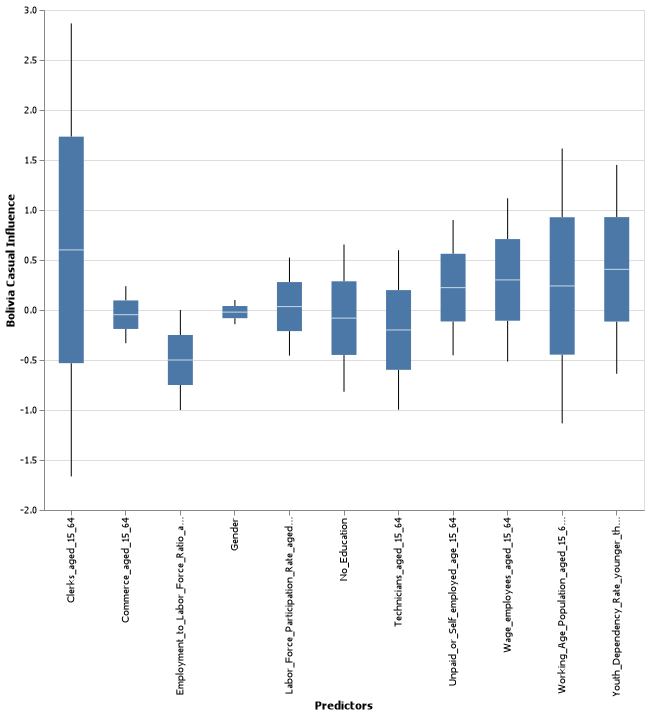

In [8]:
ConfInt= rcopy(icpBolivia["ConfInt"])
dfGraph = DataFrame(ConfInt, names(X))
dfTranspose = DataFrames.stack(dfGraph, 1:ncol(dfGraph))  |> @rename(:value => :ConfidenceInterval) |> DataFrame

dfTranspose |>
    @vlplot(
        mark={:boxplot, extent="min-max"},
        x={"variable:o", axis={title="Predictors"}},
        y={:ConfidenceInterval, axis={title="Bolivia Casual Influence"}},
        size={value=25},
        width  = 600,
        height = 500)

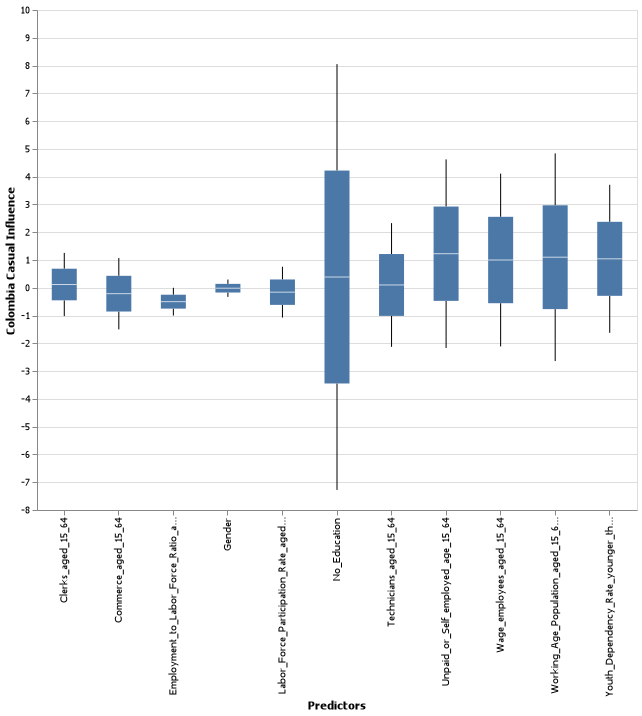

In [9]:
ConfInt= rcopy(icpColombia["ConfInt"])
dfGraph = DataFrame(ConfInt, names(X))
dfTranspose = DataFrames.stack(dfGraph, 1:ncol(dfGraph))  |> @rename(:value => :ConfidenceInterval) |> DataFrame

dfTranspose |>
    @vlplot(
        mark={:boxplot, extent="min-max"},
        x={"variable:o", axis={title="Predictors"}},
        y={:ConfidenceInterval, axis={title="Colombia Casual Influence"}},
        size={value=25},
        width  = 600,
        height = 500)

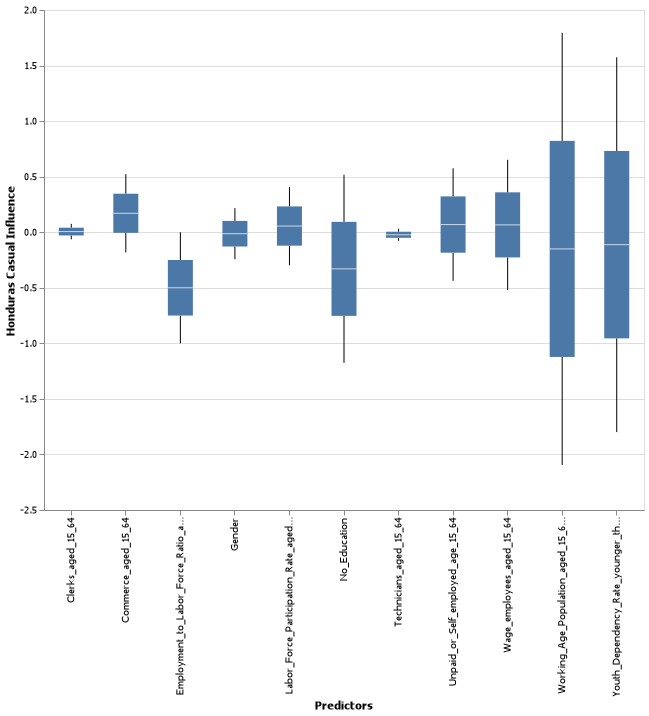

In [10]:
ConfInt= rcopy(icpHonduras["ConfInt"])
dfGraph = DataFrame(ConfInt, names(X))
dfTranspose = DataFrames.stack(dfGraph, 1:ncol(dfGraph))  |> @rename(:value => :ConfidenceInterval) |> DataFrame

dfTranspose |>
    @vlplot(
        mark={:boxplot, extent="min-max"},
        x={"variable:o", axis={title="Predictors"}},
        y={:ConfidenceInterval, axis={title="Honduras Casual Influence"}},
        size={value=25},
        width  = 600,
        height = 500)

## Interpreting the Results of the Invariant Causal Prediction 

The plots show 90% confidence intervals for the influence for the predictors of the employment dataset.  Recall that the target **Y** is variable *Unemployment_Rate*.  The Y axis in the plots is the change in unemployment rate after the experiment or intevation point.  The intervention point is when the United States financial crisis occured in 2008. The X axis in the plots are the predictors of the Invariant Causal Prediction model.  

First, let us talk about the predictors that have a strong positive causal influence. They are predictors that move the unemployment rate up. They mainly have min and max values in the positive Y axis. Bolivia's *Unpaid_or_Self_employed*, and  *Wage_employees* imply higher unemployment.  Columbia’s *Youth_Dependency_Rate_younger_than_15* mostly predict higher unemployment.  *Commerce* in Honduras have mostly positive causal influence.  
 
Second, let us consider the predictors have a strong negative causal inference. They are predictors that move the unemployment rate down. They mainly have both min and max in the negative Y axis.  *Employment_to_Labor_Force_Ratio* in the three pushes unemployment down.  *Technicians* in Honduras have small but negative causal influence.  

Third, let us think of predictors having causal influence in both positive and negative directions.  There are many examples in our plots and they are interesting to study. For example, Bolivia’s *clerks*, Columbia’s *No_education*, and Honduras' *Working_Age_Population_of_total_Pop* have big causal influences in both directions.   One would expect *no education* to only have a negative causal influence.  In the United States, more education normally implies more job opportunities.  (You can ask any of the very expensive USA Universities and they will “prove” it to you.)   Yet, in Columbia, *no education* also helps to decrease the unemployment rate.  Is our data incorrect?  I do not think so.  It appears that Columbia has many jobs that do not require education.  The *no education* folks are still finding paying jobs in Columbia.   

The ICP linear model might have benefited from more data observations going back to say 1970.  There are not many positive only or negative only casual predictors in our plots.  Perhaps,  the intervention point of 2008 did not greatly affect the countries studied in the lab.  Are economical environments continuous and not discrete? What else do you see in the plots?


## Conclusion

Correlation does not imply causation.  The purpose of this jupyter lab is to encourage conversation about how and why classical machine learning models do not handle casual interference.  The authors of [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) (2016) not only define a sophisticated mathematical model for causal inference but also create a predictive model on top of it.  The paper's authors implemented their machine learning model in a R package named [InvariantCausalPrediction](https://cran.r-project.org/web/packages/InvariantCausalPrediction/index.html) (ICP). ICP is a great package allowing us to do both.  One is to find causality between the target variable and the predictors of the dataset. And two, one is able to predict using some of the dataset variables. The lab shows the Linear Invariant Causal Prediction package in [Julia](https://julialang.org) 1.4.0. along [VegaLite](https://www.queryverse.org/VegaLite.jl/stable) plots of the model results.  The real employment dataset is from [The World Bank](https://datacatalog.worldbank.org/dataset/global-jobs-indicators-database).

It is a challenge to create such causal inference modeling.  It requires new ways of thinking and advanced mathematics. The computation is expensive in time and/or memory.  One must be very careful defining the target and the predictors of the model. That is some of the reasons casual interference is missing from many popular machine learning libraries such as Python’s Scikit-learn.

# About the Author

Clarman Cruz completed his BS/MS in Computer Science from State University of New York at Stony Brook/Albany. He has more than 15 years technology experience in the banking industry.  He plans to start in 2020 his Master of Data Science from [Central Connecticut State University](https://www2.ccsu.edu/program/DataScience_MS]).